<a href="https://colab.research.google.com/github/kovacova/random-magic/blob/master/lantern-and_wine-practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notes

[Lantern Documentation](https://pylantern.readthedocs.io/en/latest/index.html)

[Wrapping Seaborn data in a single column](https://datascience.stackexchange.com/questions/31054/how-can-i-make-seaborn-do-pairplot-such-that-it-wraps-around) 

[Resetting index in Pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html)

In [0]:
! pip install pylantern -q

In [0]:
import lantern as l
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [68]:
wine = datasets.load_wine()

# We have to manually define the data imported and columns
df = pd.DataFrame(wine.data, columns=wine.feature_names, index=None)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


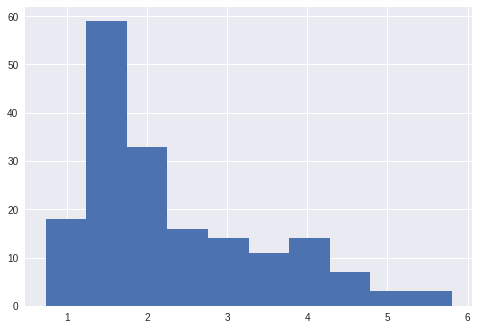

In [69]:
df['malic_acid'].hist();

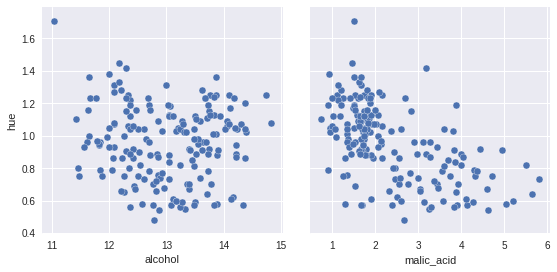

In [76]:
 sns.pairplot(df, x_vars=['alcohol', 'malic_acid'], y_vars=['hue'], size=4);

In [58]:
df.corr(method='spearman').round(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.00,0.14,0.24,-0.31,0.37,0.31,0.29,-0.16,0.19,0.64,-0.02,0.10,0.63
malic_acid,0.14,1.00,0.23,0.30,0.08,-0.28,-0.33,0.26,-0.24,0.29,-0.56,-0.26,-0.06
ash,0.24,0.23,1.00,0.37,0.36,0.13,0.08,0.15,0.02,0.28,-0.05,-0.01,0.25
alcalinity_of_ash,-0.31,0.30,0.37,1.00,-0.17,-0.38,-0.44,0.39,-0.25,-0.07,-0.35,-0.33,-0.46
magnesium,0.37,0.08,0.36,-0.17,1.00,0.25,0.23,-0.24,0.17,0.36,0.04,0.06,0.51
total_phenols,0.31,-0.28,0.13,-0.38,0.25,1.00,0.88,-0.45,0.67,0.01,0.44,0.69,0.42
flavanoids,0.29,-0.33,0.08,-0.44,0.23,0.88,1.00,-0.54,0.73,-0.04,0.54,0.74,0.43
nonflavanoid_phenols,-0.16,0.26,0.15,0.39,-0.24,-0.45,-0.54,1.00,-0.38,0.06,-0.27,-0.49,-0.27
proanthocyanins,0.19,-0.24,0.02,-0.25,0.17,0.67,0.73,-0.38,1.00,-0.03,0.34,0.55,0.31
color_intensity,0.64,0.29,0.28,-0.07,0.36,0.01,-0.04,0.06,-0.03,1.00,-0.42,-0.32,0.46


In [59]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [0]:
# Fix this
# pd.crosstab(df.alcohol, df.ash, df.magnesium, df.hue, df.proline)

# https://stackoverflow.com/questions/48855998/when-i-use-pd-crosstab-it-keeps-showing-assertionerror

In [89]:
l.plot(df, 'line', 'bokeh')

Figure(id='9235', ...)